          TMAX      TMIN      SNWD      PRCP
TMAX  1.000000  0.898038 -0.184010  0.053256
TMIN  0.898038  1.000000 -0.225649  0.026741
SNWD -0.184010 -0.225649  1.000000 -0.005913
PRCP  0.053256  0.026741 -0.005913  1.000000


<AxesSubplot:xlabel='TMAX', ylabel='TMIN'>

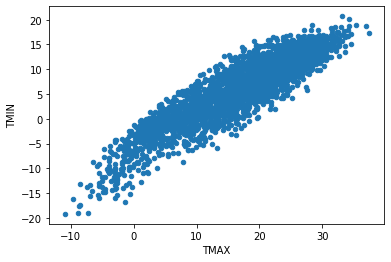

In [1]:
# Import knihovny Pandas
import pandas as pd

'''
Z .csv souboru nahráváme data o povětrnostních podmínkách ve vybraných lokalitách.
Informace k jednotlivým použitým sloupečkům DataFrame

DATE: Datum informací o povětrnostních podmínkách
NAME: Název místa
TMAX: Maximální teplota
TMIN: Minimální teplota
PRCP: Množství dešťových srážek
SNWD: Množství sněhového spadu

K výpočtu korelace byl použit výchozí způsob, tj. Pearsonůvm korelační koeficient,
viz https://www.wikiskripta.eu/w/F%C3%B3rum:Testy/Pearson%C5%AFv_korela%C4%8Dn%C3%AD_koeficient
'''

# Vytvoreni DataFrame z dat ulozenych v .csv souboru
df =  pd.read_csv('https://raw.githubusercontent.com/ICT-Pro/workshopy_rozkosny/main/ws28/pydata_data.csv',delimiter=';')
# Prevod sloupce DATE na datovy typ datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Pro ucely nasledne analyzy jsme si z DataFrame df vytvorili dalsi 3 DataFrame, ktere
# obsahuji data pro vybrane lokality. V puvodnim DataFrame byly vsechny tyto lokality ve sloupci NAME pod sebou
df_ruzyne = df.loc[df['NAME']=='RUZYNE',['DATE','TMAX','TMIN','SNWD','PRCP']].set_index('DATE',drop=True)
df_turany = df.loc[df['NAME']=='TURANY',['DATE','TMAX','TMIN','SNWD','PRCP']].set_index('DATE',drop=True)
df_viden = df.loc[df['NAME']=='WIEN',['DATE','TMAX','TMIN','SNWD','PRCP']].set_index('DATE',drop=True)
# Korelacni matice DataFrame df_ruzyne
print(df_ruzyne.corr())

'''
Interpretace korelační matice: Maximální teplota má negativní korelaci s množstvím spadeného sněhu,
maximální teplota má silnou pozitivní korelaci s minimální teplotou naměřenou ve stejném dnu
a prakticky žádnou korelaci s množstvím dešťových srážek. Nárůst či pokles teplot nemá vliv na dešťové srážky
'''

# Definice korelačního diagramu, kdy na ose x jsou hodnoty ze sloupce TMAX (maximální teplota) a na ose y hodnoty ze sloupce TMIN (minimální teplota)
df_ruzyne.plot.scatter('TMAX','TMIN')


In [3]:
# Vypocet korelace jednotlivych sloupcu mezi lokalitami RUZYNE a TURANY
print(df_ruzyne.corrwith(df_turany))
# Vypocet korelace jednotlivych sloupcu mezi lokalitami RUZYNE a WIEN
print(df_ruzyne.corrwith(df_viden))
'''
Interpretace:  Lokalita RUZYNE má vyšší korelaci u dešťových srážek a spadeného sněhu v lokalitou TURANY než lokalitou WIEN
Korelace v případě maximální teploty, tj. sloupce TMAX jsou prakticky identické.
'''

TMAX    0.967293
TMIN    0.946811
SNWD    0.484008
PRCP    0.407585
dtype: float64
TMAX    0.961921
TMIN    0.951879
SNWD    0.360302
PRCP    0.211007
dtype: float64


'\nInterpretace:  Lokalita RUZYNE má vyšší korelaci u dešťových srážek a spadeného sněhu v lokalitou TURANY než lokalitou WIEN\nKorelace v případě maximální teploty, tj. sloupce TMAX jsou prakticky identické.\n'

In [5]:
# Vytvoreni kopii DataFrame
df_ruzyne_mesicne = df_ruzyne.copy()
df_turany_mesicne = df_turany.copy()

# Vytvoreni noveho sloupce MESIC, ktery je nasledne pouzit pro agregaci
df_ruzyne_mesicne['MESIC'] = df_ruzyne_mesicne.index.month
df_turany_mesicne['MESIC'] = df_turany_mesicne.index.month

# Agregace dennich dat na mesice pri pouziti agregacni funkce mean()
df_ruzyne_mesicne = df_ruzyne_mesicne.groupby('MESIC').mean()
df_turany_mesicne = df_turany_mesicne.groupby('MESIC').mean()

# Vypocet korelace na urovni jednotlivych mesicu mezi lokalitami RUZYNE a TURANY
print(df_ruzyne_mesicne.corrwith(df_turany_mesicne,axis=1))

'''
Interpretace: Nejvyšší korelaci mají měsíční povětrnostní podmínky v měsících 11,12,1,2,3.
Nejnižší (i když stále vysokou) korelaci mají měsíční povětrnostní podmínky v měsících 6 a 10.

'''

MESIC
1     0.999829
2     0.999986
3     0.999887
4     0.973281
5     0.987380
6     0.866589
7     0.998980
8     0.994178
9     0.986795
10    0.770542
11    0.997130
12    0.999802
dtype: float64


'\nInterpretace: Nejvyšší korelaci mají měsíční povětrnostní podmínky v měsících 11,12,1,2,3.\nNejnižší (i když stále vysokou) korelaci mají měsíční povětrnostní podmínky v měsících 6 a 10.\n\n'

Cvičení

Jaký je korelační koeficient mezi sloupci TMIN a SNWD, tj. jaký vliv má minimální teplota na množství spadeného sněhu?

Vytvořte korelační diagram s TMAX na ose x a PRCP na ose Y

Reseni najdete zde: https://github.com/ICT-Pro/workshopy_rozkosny/blob/main/ws28/reseni_cviceni